In [ ]:
# Possibility of getting a folder on their downloads,
# and look in that folder and there can be subsections like Downloads/food or
# Downloads/makeup or Downloads/clothing etc. And dependent on the context of the
# outputted pdf, the machine learning algorithm will place the pdf in their respected folder

In [93]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
import os
import numpy as np
import math
from typing import List, Tuple
from sklearn.metrics.pairwise import cosine_distances
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from scipy import sparse

nltk.download('stopwords')
nltk.download('punkt')


class KNearestNeighbors:
    """A class defining the functionality for KNN"""

    def __init__(self, k=1):
        self.k = k
        self.tdif = TfidfVectorizer()
        self.KNN = KNeighborsClassifier(self.k)

    def fit_list(self, X, y) -> None:
        self.X_train = X
        self.y_train = y
        self.KNN.fit(self.X_train, self.y_train)

    def transform_list(self, X) -> TfidfVectorizer:
        self.X_train = X
        return self.tdif.fit_transform(self.X_train)

    def transform(self, X):
        return self.tdif.transform(X)

    def predict_outcome(self, i) -> str:
      labels = {
          0: "business",
          1: "entertainment",
          2: "food",
          3: "graphics",
          4: "medical",
          5: "politics",
          6: "space",
          7: "sport",
          8: "technologie"
      }
      print(self.y_train[i])
      return labels[self.y_train[i]]

    def comparison(self, X_train, input):
        """Returns the index of the closest vector in X_train to the input vector"""
        transformed_input = self.transform([input])
        distances = np.linalg.norm(X_train.toarray() - transformed_input.toarray()**2, axis=1)
        closest_index = np.argmin(distances)
        print(closest_index)
        return closest_index




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [85]:

def unzip_folder() -> None:
  !unzip "/content/archive.zip" -d "/content/archive"


def return_list_folders() -> List[str]:
  """Returns the list of folders"""
  folder_path = "/archive"
  folder_dir = os.listdir(folder_path)

  return folder_dir


def label_folders() -> dict:
  """Labels each folder with their number"""

  labeling_dict = dict()
  folder_dir = return_list_folders()
  print(folder_dir)
  for i, folder in enumerate(folder_dir):
    labeling_dict[folder] = i
  print(labeling_dict)
  return labeling_dict


def merge_training_data() -> List[List[Tuple[str, int]]]:
  """Merges the data together"""
  labeling = label_folders()
  folder_path = "/archive"
  folder_dir = return_list_folders()
  all_rows = []

  for folder in folder_dir:
    curr_file = os.listdir(f"{folder_path}/{folder}")
    for document in curr_file:
      with open(f"{folder_path}/{folder}/{document}", "r", encoding="utf-8") as file:
        all_rows.append([file.read(), labeling[folder]])

  return all_rows


['graphics', 'historical', 'space', 'entertainment', 'politics', 'sport', 'food', 'business', 'technologie', 'medical']
{'graphics': 0, 'historical': 1, 'space': 2, 'entertainment': 3, 'politics': 4, 'sport': 5, 'food': 6, 'business': 7, 'technologie': 8, 'medical': 9}
(1000, 31969)
(1000,)


ValueError: ignored

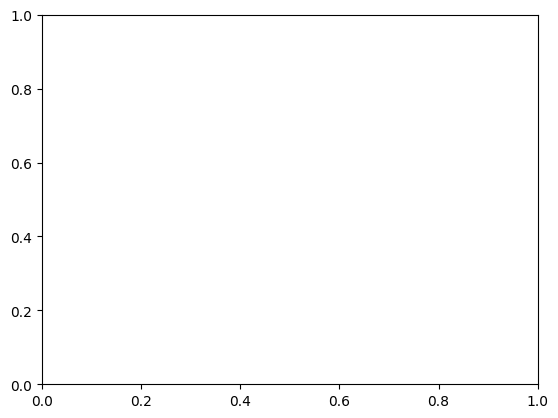

In [99]:

def split_x_y() -> dict:
  """Splits data into X_train and y_train"""

  X_train = []
  y_train = []
  training_data = merge_training_data()

  for i in training_data:
    X_train.append(i[0])
    y_train.append(i[1])

  return {"X_train": X_train, "y_train": y_train}

def stop_words_removal(X_train) -> List[str]:
  """Removes stop words from the corpus and cleans up punctuation"""


  cached_stop_words = stopwords.words("english")

  cleaned_texts = []

  for text in X_train:
      tokens = word_tokenize(text)
      cleaned_tokens = [word for word in tokens if word.lower() not in cached_stop_words and word not in string.punctuation]
      cleaned_text = " ".join(cleaned_tokens)
      fixed = cleaned_text.translate(str.maketrans('', '', string.punctuation))
      cleaned_texts.append(fixed)


  return cleaned_texts




def main():
  knn = KNearestNeighbors(k=1)
  # Problem with sizing in y_train vs X_train ( y_train dimensions are incorrect )
  training_data = split_x_y()
  X_train = training_data["X_train"]
  y_train = training_data["y_train"]
  X_train_preprocess = stop_words_removal(X_train)

  X_train_transformed = knn.transform_list(X_train_preprocess)
  knn.fit_list(X_train_transformed, y_train)


  # X_train_shape = sparse.csr_matrix(X_train_transformed).shape[0]
  # y_train_shape = np.array(y_train).shape[0]

  # print(X_train_shape)
  # print(y_train_shape)
  # plt.scatter(X_train_transformed, y_train)
  # plt.xlabel('X_train_transformed')
  # plt.ylabel('y_train')
  # plt.title('Relationship between X_train_transformed and y_train')
  # plt.show()
  # test = """My food classes are fun. I love food and so do my classmates"""


  # compare = knn.comparison(X_train_transformed, test)
  # prediction = knn.predict_outcome(compare)

  # print(compare)
  # print(prediction)

main()
